# NES-MDB

The purpose of this notebook is to showcase a few things about the NES MDB and our work on it.

In [3]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import pickle
from preprocessing import *

The purpose of this notebook is to showcase a few things about the NES MDB and our work on it.

# 1. Music Statistics.

We begin by first loading the data. We apply a preprocessing step where we move all the notes so that there is no spacing between 0 and the rest of the integers. We remark that for P1 and P2, the note 32 is never played, so we ignore it and shift it down.

In [4]:
def song_loader(folder):
    processed_songs = []

    #instrument info.
    #(key,val) = (instrument, (note_size,velocity_size, timbre_size))
    voices = {"P1": (77,16,4),
                   "P2": (77,16,4),
                   "TR": (89,0,0),
                   "NO": (17,16,2)}

    #First, we define the functions which will normalize our notes
    #to begin at 0.

    P1_normalizer = np.vectorize(lambda x : x - 32 if x > 0 else 0)
    P2_normalizer = np.vectorize(lambda x : x - 32 if x > 0 else 0)
    TR_normalizer = np.vectorize(lambda x : x - 20 if x > 0 else 0)



    for song in glob.glob(folder + '/*'):
        with open(song, 'rb') as song_info:
            rate, nsamps, exprsco = pickle.load(song_info)

            #Normalize the notes for the voices.
            exprsco[:,0] = P1_normalizer(exprsco[:,0])
            exprsco[:,1] = P2_normalizer(exprsco[:,1])
            exprsco[:,2] = TR_normalizer(exprsco[:,2])

            processed_songs.append(exprsco)
    
    return processed_songs

def note_counter(songs):
    P1 = Counter()
    P2 = Counter()
    TR = Counter()
    NO = Counter()
    voice_counts = [P1,P2,TR,NO]

    for song in processed_songs:
        for voice in range(4):
            for note in song[:,voice]:
                voice_counts[voice][note] += 1
    
    return voice_counts

processed_songs   = song_loader(folder = 'nesmdb24_seprsco/train')
voice_counts = note_counter(processed_songs)

KeyboardInterrupt: 

We begin by first preparing a function to count the number of times each notes appears for each instrument. As it turns out, the most popular note is "0" i.e. that the instrument is not playing. We will plot the counts for the all the notes per instrument in a moment, but we first want to emphasize just how often each voice is turned off. Most notably, notice that for the noise voice, 0 appears more than 50% of the time. It might even be worth considering removing it entirely for the dimension reduction. 

In [ ]:
voices = ["P1","P2","TR","NO"]
tot_count = sum(voice_counts[0].values())

for voice,note_count in zip(voices,voice_counts):
    percentage = 100*note_count[0]/tot_count
    print(voice + " is turned off for {:.2f}% of the time.".format(percentage))

In [ ]:
def note_plotter(ax,voice_counts):
    notes,counts = [],[]
    for note, count in voice_counts.items():
        notes.append(note)
        counts.append(count)
    max_note = max(notes)+1
    #plt.figure(figsize=(20,10))
    #plt.xticks(np.arange(0, max_note, 1))
    ax.hist(notes, weights= counts, bins=range(max_note))
    ax.set_xlim(0,max_note-1)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,7))
fig.suptitle("Histograms for Pulses",fontsize = 40)

#First, we do voice P1.
note_plotter(ax1,voice_counts[0])
ax1.set_xlabel("Notes for P1", fontsize=20)
ax1.set_ylabel("Counts", fontsize=20)
ax1.set_ylim(0,600000)

#Now voice P2
note_plotter(ax2,voice_counts[1])
ax2.set_xlabel("Notes for P2", fontsize=20)
ax2.set_ylim(0,600000)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
note_plotter(ax, voice_counts[2])
ax.set_xlabel("Notes for TR", fontsize=20)
ax.set_ylabel("Counts", fontsize=20)
_ = ax.set_title("Histogram for TR voice", fontsize=20)

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
note_plotter(ax, voice_counts[3])
ax.set_xlabel("Notes for NO", fontsize=20)
ax.set_ylabel("Counts", fontsize=20)
_ = ax.set_title("Histogram for NO voice", fontsize=20)

## Frozen time

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
j = 2
voice_names = ["P1","P2", "TR","NO"]
fig, ax = plt.subplots(figsize = (17,7))
sns.barplot(x= [i for i in range(len(cnts[j]))], y = [len(Z) for Z in cnts[j]], ax = ax)
ax.set_xlabel("Note range", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
_ = ax.set_title("How many times did each " + voice_names[j] +" note get held?", fontsize=20)

In [ ]:
fig2, ax2 = plt.subplots(figsize = (15,7))
sns.countplot(x=cnts[3][0], ax = ax2)
ax2.set_title("Number of times the NO voice was turned off per duration.", fontsize=20)
ax2.set_xlabel("Number of timesteps held.", fontsize= 20)
ax2.set_ylabel("Count", fontsize=20)

In [ ]:
fig2, ax2 = plt.subplots(figsize = (15,7))
sns.countplot(x=cnts[2][0], ax = ax2)
ax2.set_title("Number of times the TR voice was turned off per duration.", fontsize=20)
ax2.set_xlabel("Number of timesteps held.", fontsize= 20)
ax2.set_ylabel("Count", fontsize=20)

In [ ]:
fig2, ax2 = plt.subplots(figsize = (15,7))
sns.countplot(x=cnts[1][0], ax = ax2)
ax2.set_title("Number of times the P2 voice was turned off per duration.", fontsize=20)
ax2.set_xlabel("Number of timesteps held.", fontsize= 20)
ax2.set_ylabel("Count", fontsize=20)

In [ ]:
fig2, ax2 = plt.subplots(figsize = (15,7))
sns.countplot(x=cnts[0][0], ax = ax2)
ax2.set_title("Number of times the P1 voice was turned off per duration.", fontsize=20)
ax2.set_xlabel("Number of timesteps held.", fontsize= 20)
ax2.set_ylabel("Count", fontsize=20)

## 2. Song Dictionary.

During our preprocessing, we chopped the music into several pieces. In order to assign meaning to each piece, we created a dictionary which takes a song name and gives you all the pieces associated with that name. We leave it for reference.

In [4]:
with open('52_12_TR_song_dict','rb') as file:
    song_dict = pickle.load(file)

In [17]:
#song_dict['nesmdb24_seprsco/train/380_WaronWheels_10_11ResultsTheme.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/221_MarioBros__01_02GameStartA.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/303_SpaceHarrier_11_12Hayaoh.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/346_TheJungleBook_04_05Level4Level7Level10.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/199_Labyrinth_MaounoMeikyu_08_09Oubliette.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/082_Dr_Mario_08_09Ending.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/105_FamicomJump_HeroRetsuden_06_07AdventureJumpWorld.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/117_FinalFantasy_11_12MenuScreen.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/053_ChoujinSentaiJetman_01_02AreaSelect.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/329_SwordMaster_06_07Stage3.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/025_BatmanReturns_03_04Opening1.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/032_BioSenshiDan_IncreasertonoTatakai_04_05Stage3.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/322_SuperMarioBros__02_03SwimmingAround.seprsco.pkl']
#song_dict['nesmdb24_seprsco/train/106_FamicomMukashiBanashi_ShinOnigashima_05_06SecondChapterInsidetheHouseNight.seprsco.pkl']
song_dict['nesmdb24_seprsco/train/042_CaptainTsubasaVol_II_SuperStriker_19_20FlamengoBeforeTheGame.seprsco.pkl']

[133920,
 133921,
 133922,
 133923,
 133924,
 133925,
 133926,
 133927,
 133928,
 133929,
 133930,
 133931,
 133932,
 133933,
 133934,
 133935,
 133936,
 133937,
 133938,
 133939,
 133940,
 133941,
 133942,
 133943,
 133944,
 133945,
 133946,
 133947,
 133948,
 133949,
 133950,
 133951,
 133952,
 133953,
 133954,
 133955,
 133956,
 133957,
 133958,
 133959,
 133960,
 133961,
 133962,
 133963,
 133964,
 133965,
 133966,
 133967,
 133968,
 133969,
 133970,
 133971,
 133972,
 133973,
 133974,
 133975,
 133976,
 133977,
 133978,
 133979,
 133980]

In [23]:
song_dict['nesmdb24_seprsco/train/325_SuperMarioWorld_01_02YoshisIsland.seprsco.pkl']

[591037,
 591038,
 591039,
 591040,
 591041,
 591042,
 591043,
 591044,
 591045,
 591046,
 591047,
 591048,
 591049,
 591050,
 591051,
 591052,
 591053]

In [ ]:
song_dic

# Data Structure Analysis

In [160]:
def process(song, og_count, new_count, cpt_count):    
    with open(song, 'rb') as song_info:
        rate, nsamps, seprsco = pickle.load(song_info)
    seprsco[:,3] = 0
    normalized_score = song_normalizer(seprsco.copy(),'seprsco',False,None)
    score, valid = new_scorer(normalized_score,77,32,True,True)
    compact_score, valid = compactify_score(seprsco,77,32,True,True)
    #og_count.append(score)
    if not valid:
        return
    #new_score = postprocessing_sparse([score], None, True)[0]
    #assert np.array_equal(new_score,seprsco)
    og_count.append(seprsco.shape[0])
    new_count.append(score.shape[0])
    cpt_count.append(compact_score.shape[0])


In [161]:
import time
from multiprocessing import Pool

folder = 'nesmdb24_seprsco/train'
A,B,C = [],[],[]
start = time.time()
for i,song in enumerate(glob.glob(folder + '/*')):
    process(song,A,B,C)
print(time.time()-start)
A,B,C = np.asarray(A), np.asarray(B), np.asarray(C)

51.431684255599976


In [162]:
A.mean(), B.mean(), C.mean()

(690.6361471288701, 673.6229161153744, 1076.5800476316485)

In [164]:
(B>A).mean()

0.41148451971421013

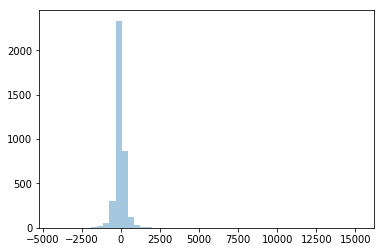

In [163]:
sns.distplot(B-A, kde=False)

In [138]:
def sparse_score(score, note_size, max_len, separate=True, TR=False):
    """
    ----------------------------------------------------------------------------
    This turns a piano_roll for a single voice into a sequence of events,
    similar to Magenta's event decomposition. We count how many steps a note is
    held, then turn into two events. The first event consists of a onehot version
    of the note, and the other consists of onehot version of the number of steps
    into the future.

    Args:
        score (np.array): Normalized score.
        note_size (int): Number of notes per instrument, including off.
        max_len (int): Maximum length allowed.
        separate (bool): If True, separate P1 notes, P2 notes and time shift by
        adding note_size.

    Returns:
        events (np.array): An array containing appropiate note values and counts,
         with an offset by timesteps. Shape =(3, 2*timesteps+1)
        lengths (np.array): An array containing lengths. Shape = (3,)
    ----------------------------------------------------------------------------
    """
    events = []
    voices = ["P1","P2","TR","NO"]
    timesteps = score.shape[0]
    voices = 3 if TR else 2
    lengths = []
    score_length = score.shape[0]
    last_notes = score[0]
    max_count = 0
    count = 0

    #Compute offsets.
    offset = 0
    P2_offset = note_size
    TR_offset = 2*note_size
    cnt_offset = 2*note_size - 1 + (note_size + 12)
    cnt_offset = cnt_offset if TR else 2*note_size -1
    voice_offsets = [0,P2_offset, TR_offset]


    events = [last_notes[i] + offset for i, offset in enumerate(voice_offsets[:voices])]
    for notes in score:
        #If same note, increase count.
        if np.array_equal(notes,last_notes):
            count += 1
            #cur_count += 1
            continue

        events.append(cnt_offset + count + offset)
        max_count = max(max_count,count)
        count = 1

        #events += [offset + notes[i] for i,offset in enumerate(voice_offsets[:voices])]
        for i in range(3):
            if last_notes[i] != notes[i]:
                events.append(voice_offsets[i] + notes[i])
        last_notes = notes

        if max_count > max_len:
            return (0,False)
    max_count = max(count, max_count)
    if max_count > max_len:
        return (0,False)

    events.append(cnt_offset + count + offset)
    events = np.asarray(events).astype(np.int16)

    return (events, True)

In [155]:
def postprocessing_sparse(data, threshold, separate=True):
    
    P1_normalizer = lambda x : x + 32 if x > 0 else 0
    P2_normalizer = lambda x : x + 32 if x > 0 else 0
    TR_normalizer = lambda x : x + 20 if x > 0 else 0
    #NO_normalizer = np.vectorize(lambda x : x)

    normalizers = [P1_normalizer,P2_normalizer, TR_normalizer]

    res = []
    note_size = 108-32+1
    offset = 0
    P2_offset = note_size if separate else 0
    TR_offset = 2*note_size if separate else 0
    cnt_offset = 2*note_size - 1 + (note_size + 12) if separate else 0

    for song in data:
        notes = [[P1_normalizer(song[0]), P2_normalizer(song[1]-P2_offset), TR_normalizer(song[2]-TR_offset),0] for _ in range(song[3]-cnt_offset)]
        last_notes = notes[-1][:]
        new_notes = []
        for event in song[4:]:
            if event < P2_offset: #P1 pitch change.
                last_notes[0] = P1_normalizer(event)
            elif P2_offset <= event < TR_offset: #P2 pitch change
                last_notes[1] = P2_normalizer(event - P2_offset)
            elif TR_offset <= event <= cnt_offset: #TR pitch change
                last_notes[2] = TR_normalizer(event - TR_offset)
            else:
                cnt = event - cnt_offset
                assert cnt > 0, cnt
                notes.extend([last_notes[:]]*cnt)

        res.append(np.asarray([notes]))
    
    return np.vstack(res)
        